# 공공데이터(공공자전거)를 이용한 정형 데이터 관리(pandas)

## <작업사항>
- 데이터셋: 서울시 공공데이터 = >서울특별시 공공자전거 이용정보(시간대별)_2021년.zip
- pandas를 이용한 데이터 관리 복습
- 데이터 전체 상황 파악
- 데이터 전처리 진행
- 시각화

In [1]:
# 메모리 사용중인 변수 모두 삭제
val_all =[val for val in list(globals()) if val != "_"]
for val in val_all:
    del globals()[val]

#### 차트 한글 지원 설정

In [3]:
import matplotlib.pyplot as plt
import platform

# 차트 한글 처리
from matplotlib import font_manager, rc

plt.rc('font', family = 'AppleGothic')

# 마이너스 기호(-) 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

### 1. 데이터 불러오기
- 공공자전거 이용정보 중 2021.01 자료만 읽어오기
- 데이터 정보 확인(행/열 갯수/데이터 파입)
- 폴더의 전체 데이터 가져와 하나의 데이터로 합치기

In [4]:
# 공공자전거 이용정보 2021년 1월 데이터 (서울특별시 공공자전거 이용정보(시간대별)_21.01.csv)가져오기
import pandas as pd

file_path="./data/서울특별시 공공자전거 이용정보(시간대별)_21.01.csv"
df1 = pd.read_csv(file_path, encoding="cp949")

# 데이터 정보 확인(행/열 갯수/데이터 파입)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718857 entries, 0 to 718856
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   대여일자    718857 non-null  object 
 1   대여시간    718857 non-null  int64  
 2   대여소번호   718857 non-null  int64  
 3   대여소명    718857 non-null  object 
 4   대여구분코드  718857 non-null  object 
 5   성별      401235 non-null  object 
 6   연령대코드   718857 non-null  object 
 7   이용건수    718857 non-null  int64  
 8   운동량     718857 non-null  object 
 9   탄소량     718857 non-null  object 
 10  이동거리    718857 non-null  float64
 11  사용시간    718857 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 65.8+ MB


In [ ]:
# 폴더의 전체 데이터 가져와 하나의 데이터로 합치기
# from glob import glob  # 지정된 폴더에 특정 문자가 포함된 데이터를 리스트 형태로 제공

import glob

dirPath="./data/"
files=glob.glob(dirPath + '*자전거*.csv')  # 저전거가 포함되어 있으면서 .csv로 끝난 모든 파일
#files=glob.glob(dirPath + '*_21.??.csv')   # * : 전체 글자/ ? : 한 글자 / ** : 하위 폴더까지 포함
#print(files)

In [ ]:
df_seoul = pd.DataFrame()

for file in files:
    try:
        df = pd.read_csv(file, encoding="cp949")
    except:
        df = pd.read_csv(file, encoding="utf-8")
        
    df_seoul=pd.concat([df_seoul, df])
    
df_seoul.reset_index(drop=True, inplace=True)
df_seoul.info()

c:/pydata/seoul_data\서울특별시 공공자전거 이용정보(시간대별)_21.02.csv


C:\Users\user01\AppData\Local\Temp/ipykernel_10884/3662367530.py:8: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, encoding="utf-8")


c:/pydata/seoul_data\서울특별시 공공자전거 이용정보(시간대별)_21.03.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25421814 entries, 0 to 25421813
Data columns (total 12 columns):
 #   Column  Dtype  
---  ------  -----  
 0   대여일자    object 
 1   대여시간    int64  
 2   대여소번호   int64  
 3   대여소명    object 
 4   대여구분코드  object 
 5   성별      object 
 6   연령대코드   object 
 7   이용건수    object 
 8   운동량     object 
 9   탄소량     object 
 10  이동거리    float64
 11  사용시간    float64
dtypes: float64(2), int64(2), object(8)
memory usage: 2.3+ GB


In [ ]:
display(df_seoul.tail())

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
25421809,2021-12-31,23,4561,4561. 양평역 1번출구,정기권,M,50대,1,22.95,0.19,840.00,4.0
25421810,2021-12-31,23,815,815. LIG강촌아파트 103동앞,정기권,M,50대,1,30.20,0.21,907.98,8.0
25421811,2021-12-31,23,2173,2173. 당곡사거리,정기권,M,60대,1,64.55,0.48,2063.26,13.0
25421812,2021-12-31,23,2718,2718.마곡수명산파크1단지,정기권,M,60대,1,27.84,0.22,950.00,8.0
25421813,2021-12-31,23,4620,4620. 삼각지역 14번 출구 앞(교통섬),정기권,M,70대~,1,29.80,0.23,990.00,8.0


In [ ]:
df_seoul.to_csv("c:/pydata/seoul_data/df_seoul_bike_2021.csv", index=False)
print("종료")

종료


#### 서울시 자전거 대여소 정보 가져오기

In [ ]:
seoul_bike=pd.read_csv("c:/pydata/seoul_data/서울시 대여소 정보(21.12월 기준).csv", encoding="cp949",
                       header=4)
seoul_bike = seoul_bike.iloc[:, :6]   # 앞쪽 6개 열만 가져오기
seoul_bike.columns = ['대여소번호', '대여소명', '자치구', '상세주소', '위도', '경도'] # 열 이름 정의
display(seoul_bike.head())

,대여소번호,대여소명,자치구,상세주소,위도,경도
0,102,망원역 1번출구 앞,마포구,서울특별시 마포구 월드컵로 72,37.555649,126.910629
1,103,망원역 2번출구 앞,마포구,서울특별시 마포구 월드컵로 79,37.554951,126.910835
2,104,합정역 1번출구 앞,마포구,서울특별시 마포구 양화로 59,37.550629,126.914986
3,105,합정역 5번출구 앞,마포구,서울특별시 마포구 양화로 48,37.550007,126.914825
4,106,합정역 7번출구 앞,마포구,서울특별시 마포구 독막로 4,37.548645,126.912826


In [ ]:
print(df_seoul.isna().sum())

대여일자             0
대여시간             0
대여소번호            0
대여소명             0
대여구분코드          12
성별        10764125
연령대코드            0
이용건수             0
운동량              0
탄소량              0
이동거리            14
사용시간            76
dtype: int64


In [ ]:
# 시간대별 데이터에서 필요한 열 값만 가져오기
display(df_seoul[['대여일자', "대여시간", "대여소번호", "이용건수", "연령대코드"]].head())
df_seoul=df_seoul[['대여일자', "대여시간", "대여소번호", "이용건수", "연령대코드"]]
print(df_seoul.info())

,대여일자,대여시간,대여소번호,이용건수,연령대코드
0,2021-01-01,0,1347,2,~10대
1,2021-01-01,0,1349,1,~10대
2,2021-01-01,0,1168,1,~10대
3,2021-01-01,0,2619,1,~10대
4,2021-01-01,0,536,1,~10대


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25421814 entries, 0 to 25421813
Data columns (total 5 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   대여일자    object
 1   대여시간    int64 
 2   대여소번호   int64 
 3   이용건수    object
 4   연령대코드   object
dtypes: int64(2), object(3)
memory usage: 969.8+ MB
None


In [ ]:
## 이용건수 데이터 타입 변경하기
print(df_seoul.dtypes)    # 데이터 타입 확인
print(df_seoul['이용건수'].unique())    # 이용건수에 대한 고유값
display(df_seoul[df_seoul['이용건수']=="\\N"])

df_seoul[df_seoul['이용건수']=="\\N"]['이용건수'] = 1
display(df_seoul[df_seoul['이용건수']=="\\N"])

대여일자     object
대여시간      int64
대여소번호     int64
이용건수     object
연령대코드    object
dtype: object
[2 1 3 5 4 6 7 8 12 10 11 9 14 13 '1' '2' '4' '3' '5' '6' '0.00' '11.45'
 '128.54' '31.13' '\\N' 97.63 0.64 1.32 52.87 166.28 61.09 36.8 76.82
 21.07 0.12 10.25 69.27 32.97 15.0 48.34 24.97 21.0 20.77 31.24 184.38 17
 16 20 25 22 80.39 0.0 40.49 9.9 168.37 13.24 31.63 48.31 19.0 287.06 0.44
 61.64 154.06 110.05 0.19 0.23 862.18 161.44 0.25 0.5 13.29 103.25 279.13
 29.87 2.07 44.53 210.09 673.01 32.67 42.08 116.13 23.12 0.58 81.38 0.26
 210.78 0.92 47.65 65.72 173.67 38.51 503.1 25.83 54.85 92.24 386.83
 154.18 34.88 18.0 225.21 62.93 45.85 24 28 23 29]


,대여일자,대여시간,대여소번호,이용건수,연령대코드
777567,2021-02-02,18,314,\N,1


C:\Users\user01\AppData\Local\Temp/ipykernel_10884/2099614951.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul[df_seoul['이용건수']=="\\N"]['이용건수'] = 1


,대여일자,대여시간,대여소번호,이용건수,연령대코드
777567,2021-02-02,18,314,\N,1


In [ ]:
#df_seoul=df_seoul.drop(777567, axis=0)   # 인덱스를 이용해 행 삭제

df_seoul=df_seoul.astype({"이용건수":float})
print(df_seoul.dtypes)

대여일자      object
대여시간       int64
대여소번호      int64
이용건수     float64
연령대코드     object
dtype: object


In [ ]:
print(df_seoul['연령대코드'].unique())

['~10대' '20대' '30대' '40대' '50대' '60대' '70대~' '50??,1"' '1' '20??,1"'
 '62.65' '146.58' '12.43' '0.00' '30??,1"' '60??,1"' '55.93' '2' '26.16'
 '25.17' '40??,1"' '27.28' '63.53' '30??,2"' '317.59' '63.96' '27.30'
 '102.45' '20??,2"' '3' '21.20']


In [ ]:
### 대여시간별 대여건수 
dfs_group=df_seoul.groupby("대여시간")[['이용건수']].sum()
display(dfs_group)

,이용건수
대여시간,
0,525190.00
1,339675.00
2,218749.73
3,147721.00
4,122552.00
5,201862.55
6,443855.25
7,1085973.95
8,1797675.19


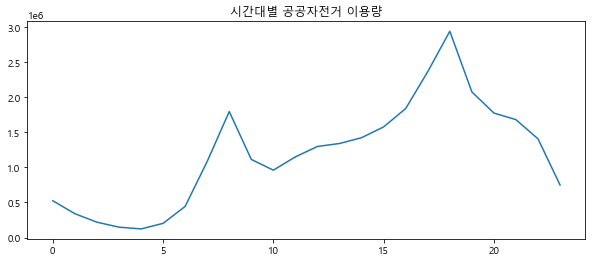

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 4))
plt.title('시간대별 공공자전거 이용량')
plt.plot(dfs_group.index, dfs_group.이용건수)
plt.show()

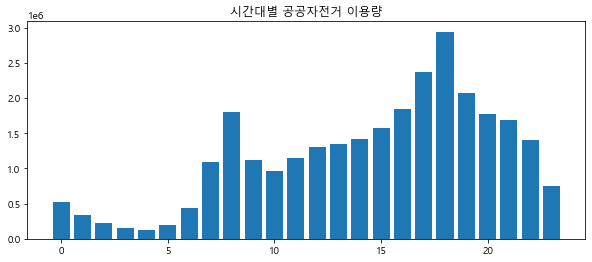

In [ ]:
plt.figure(figsize=(10, 4))
plt.title('시간대별 공공자전거 이용량')
plt.bar(dfs_group.index, dfs_group.이용건수)
plt.show()

In [ ]:
# 시간대별/대여소번호별 이용량 분석
dfs_group=df_seoul.groupby(["대여소번호", "대여시간"])[['이용건수']].sum()
display(dfs_group)
dfs_group.reset_index(drop=False, inplace=True)
display(dfs_group)

이용건수
대여소번호 대여시간      
3     1      7.0
      6      1.0
      7      4.0
      8      2.0
      11     5.0
...          ...
99998 22     1.0
      23     1.0
99999 11    11.0
      13     2.0
      18     1.0

[62948 rows x 1 columns]

,대여소번호,대여시간,이용건수
0,3,1,7.0
1,3,6,1.0
2,3,7,4.0
3,3,8,2.0
4,3,11,5.0
...,...,...,...
62943,99998,22,1.0
62944,99998,23,1.0
62945,99999,11,11.0
62946,99999,13,2.0


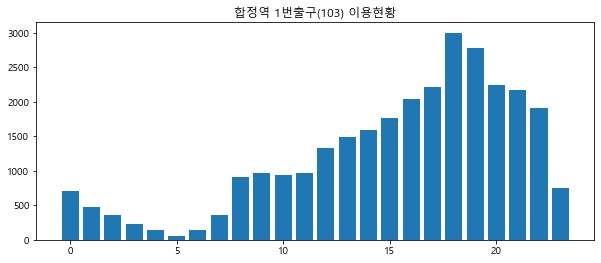

In [ ]:
#display(dfs_group[dfs_group['대여소번호']==103])
plt_df=dfs_group[dfs_group['대여소번호']==103]

plt.figure(figsize=(10, 4))
plt.bar(plt_df['대여시간'], plt_df.이용건수)
plt.title("합정역 1번출구(103) 이용현황")
plt.show()

In [ ]:
display(seoul_bike.tail())
print(seoul_bike['대여소번호'].unique())

,대여소번호,대여소명,자치구,상세주소,위도,경도
2581,5070,마곡13단지힐스테이트마스터 후문(1320동 앞),강서구,서울시 강서구 마곡중앙1로 71 마곡13단지힐스테이트마스터 후문 인근,37.556763,126.818695
2582,5072,김포공항입구 교통섬,강서구,공항동 74-5,37.561546,126.807083
2583,5073,우장산역 헤링턴타워 앞,강서구,화곡동 1013-3,37.546619,126.836235
2584,5074,마곡동 주니어마곡점앞,강서구,강서구 마곡동 798-17,37.558235,126.825760
2585,5075,템퍼 목동점,강서구,강서구 등촌동 649-14,37.551884,126.863571


[ 102  103  104 ... 5073 5074 5075]


In [ ]:
# 대여소별 사용현황
dfs_group=df_seoul.groupby(["대여소번호"])[['이용건수']].sum()
dfs_group=dfs_group.reset_index()
display(dfs_group.head())

,대여소번호,이용건수
0,3,141.0
1,5,83.0
2,10,821.0
3,101,821.0
4,102,36399.0


In [ ]:
print(seoul_bike.dtypes)

대여소번호      int64
대여소명      object
자치구       object
상세주소      object
위도       float64
경도       float64
dtype: object


In [ ]:
## 대여소 정보와 대요소번호 데이터 merge 진행
# 두 데이터를 대여소번호를 기준으로 열병합(열추가), 대여소번호가 일치하는 값만 진행
seoul_bike_m=pd.merge(seoul_bike, dfs_group, on="대여소번호")  
display(seoul_bike_m)

,대여소번호,대여소명,자치구,상세주소,위도,경도,이용건수
0,102,망원역 1번출구 앞,마포구,서울특별시 마포구 월드컵로 72,37.555649,126.910629,36399.0
1,103,망원역 2번출구 앞,마포구,서울특별시 마포구 월드컵로 79,37.554951,126.910835,29574.0
2,104,합정역 1번출구 앞,마포구,서울특별시 마포구 양화로 59,37.550629,126.914986,15480.0
3,105,합정역 5번출구 앞,마포구,서울특별시 마포구 양화로 48,37.550007,126.914825,12091.0
4,106,합정역 7번출구 앞,마포구,서울특별시 마포구 독막로 4,37.548645,126.912826,36123.0
...,...,...,...,...,...,...,...
2579,5070,마곡13단지힐스테이트마스터 후문(1320동 앞),강서구,서울시 강서구 마곡중앙1로 71 마곡13단지힐스테이트마스터 후문 인근,37.556763,126.818695,1241.0
2580,5072,김포공항입구 교통섬,강서구,공항동 74-5,37.561546,126.807083,611.0
2581,5073,우장산역 헤링턴타워 앞,강서구,화곡동 1013-3,37.546619,126.836235,277.0
2582,5074,마곡동 주니어마곡점앞,강서구,강서구 마곡동 798-17,37.558235,126.825760,467.0


In [ ]:
## how로 변합 기준 정의:  생략=>공동, "outer"=>전체, 'left' =>왼쪽기준, 'right'=>오른쪼 기준
seoul_bike_m=pd.merge(seoul_bike, dfs_group, on="대여소번호", how='left')  
display(seoul_bike_m)

,대여소번호,대여소명,자치구,상세주소,위도,경도,이용건수
0,102,망원역 1번출구 앞,마포구,서울특별시 마포구 월드컵로 72,37.555649,126.910629,36399.0
1,103,망원역 2번출구 앞,마포구,서울특별시 마포구 월드컵로 79,37.554951,126.910835,29574.0
2,104,합정역 1번출구 앞,마포구,서울특별시 마포구 양화로 59,37.550629,126.914986,15480.0
3,105,합정역 5번출구 앞,마포구,서울특별시 마포구 양화로 48,37.550007,126.914825,12091.0
4,106,합정역 7번출구 앞,마포구,서울특별시 마포구 독막로 4,37.548645,126.912826,36123.0
...,...,...,...,...,...,...,...
2581,5070,마곡13단지힐스테이트마스터 후문(1320동 앞),강서구,서울시 강서구 마곡중앙1로 71 마곡13단지힐스테이트마스터 후문 인근,37.556763,126.818695,1241.0
2582,5072,김포공항입구 교통섬,강서구,공항동 74-5,37.561546,126.807083,611.0
2583,5073,우장산역 헤링턴타워 앞,강서구,화곡동 1013-3,37.546619,126.836235,277.0
2584,5074,마곡동 주니어마곡점앞,강서구,강서구 마곡동 798-17,37.558235,126.825760,467.0
